<a href="https://colab.research.google.com/github/abakm/AL-ML_Assignment-1/blob/master/Case_Study_02_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [82]:
# Load dataset
df = pd.read_csv('./Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [83]:
# checking for null values
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [84]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [85]:
# checking for types
df.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [86]:
# Feature columns
features  = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [87]:
# Data preprocessing - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df = pd.DataFrame(X_scaled, columns=features)

Channel, Region are  appears to be a categorical variables as K-Means relies on distance calculations. If Channel is numerical just representing an ID, it's not a characteristic for clustering.

In [88]:
# set feature
x = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Clustering

### using Kmeans

In [89]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(x)
  wcss.append(km.inertia_)

wcss

[2639.9999999999977,
 1954.1835647259281,
 1619.952782172456,
 1325.9794740571892,
 1058.77125325701,
 926.8268264321838,
 837.336263812776,
 747.2475741518653,
 654.9892143112983,
 605.9527278662534]

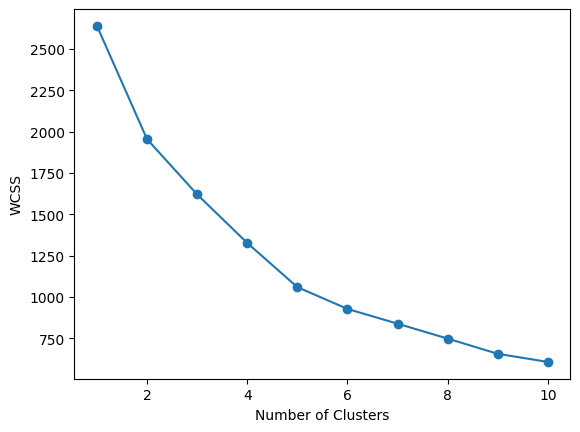

In [90]:
# plot number of cluters agaist WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Elbow Method Analysis: The plot shows a clear "elbow" or bend at k=3, where the rate of decrease in WCSS (Within-Cluster Sum of Squares) significantly slows down.

In [91]:
# Create and fit the model

km = KMeans(n_clusters=3, n_init=10)
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [92]:
# Predict the model
cluster_labels = km.predict(x)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [93]:
# items in each clusters
pd.Series(cluster_labels).value_counts()

,count
1,393
2,45
0,2


In [94]:
# Assign cluster labels to dataset
df['kmeans_cluster'] = cluster_labels
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans_cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,2
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


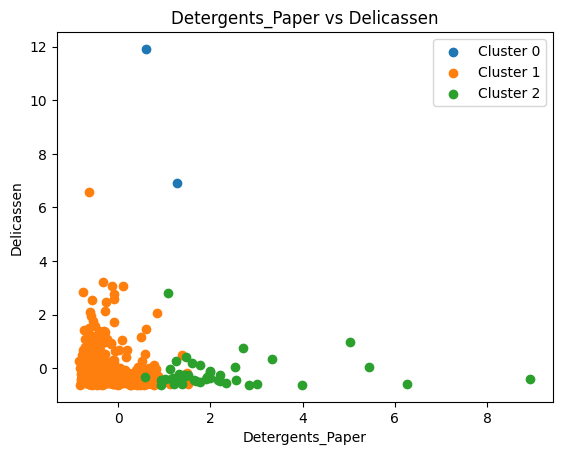

In [95]:
for i in range(max(cluster_labels)+1):
  cluster_data = x[df['kmeans_cluster'] == i]
  plt.scatter(cluster_data['Grocery'], cluster_data['Frozen'], label=f"Cluster {i}")


plt.legend()
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title("Detergents_Paper vs Delicassen")
plt.show()


In [96]:
# predict the model
cluster = km.predict([[12669,	9656,	7561,	214,	2674,	1338]])
print(cluster[0])

0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### using Agglomerative Hierarchical Clustering

In [97]:
# using linkage
merge = linkage(x, method='ward')

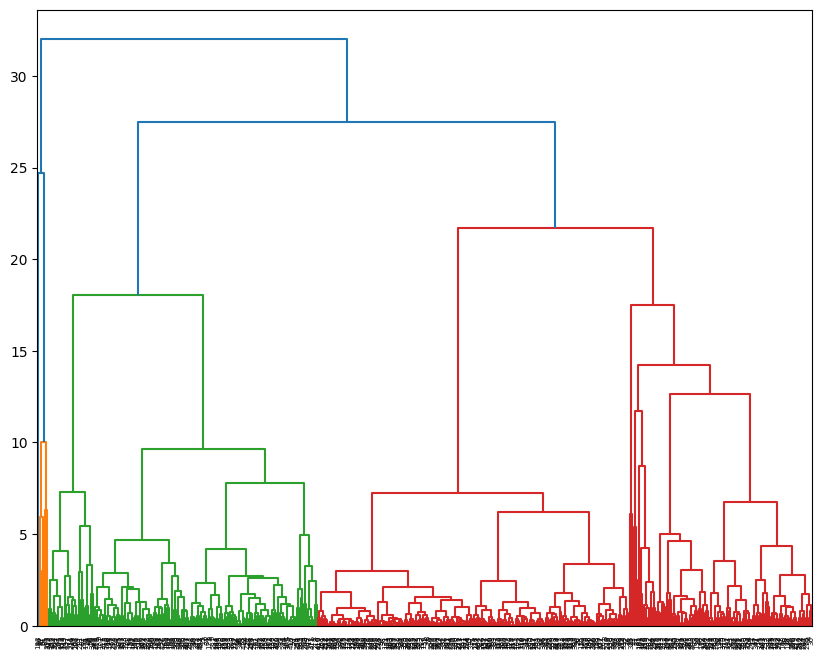

In [98]:
# ploting dendrogram

plt.figure(figsize=(10, 8))
dendrogram(merge)
plt.show()

In [99]:
cluster = fcluster(merge, 25, criterion='distance')

In [100]:
cluster

array([2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 1, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3,

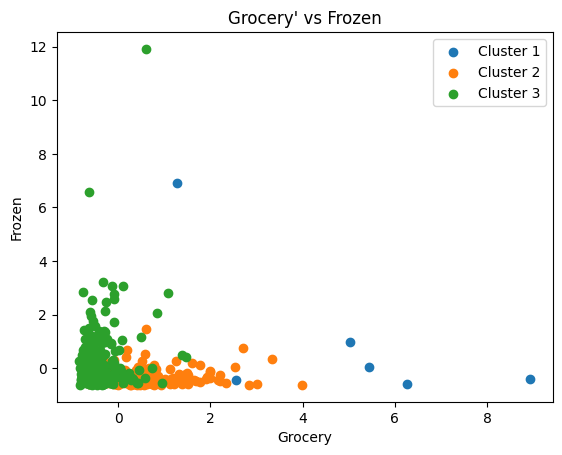

In [101]:
for i in range(1, max(cluster)+1):
  cluster_data = x[cluster==i]
  plt.scatter(cluster_data['Grocery'], cluster_data['Frozen'],label=f"Cluster {i}")



plt.legend()
plt.xlabel('Grocery')
plt.ylabel("Frozen")
plt.title("Grocery' vs Frozen")
plt.show()